### Import custom modules from current folder

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import nltk
from text_easability_metrics import TextEasabilityMetrics, StanfordNLP
from simple_text_representation.classes import Text
from simple_text_representation.models import Database
from nltk.tree import Tree
import pandas as pd
import numpy as np
# from nltk.draw.tree import draw_trees

In [4]:
database = Database('educationalTexts', 'postgres', '', '0.0.0.0', 5432)
path = r'/Users/herbert/Projects/Tesis/stanford-corenlp-full-2017-06-09'
path = r'http://corenlp.run'
path = r'http://localhost/'

##### StanfordNLP test

In [5]:
stanfordNLP = StanfordNLP(language='es')

2018-06-22 08:23:21,560 : INFO : Using an existing server http://localhost:9000
2018-06-22 08:23:22,564 : INFO : The server is available.


### Test the metric in all the text

In [19]:
np.concatenate((dfSeventh['value'].values,
               dfEighth['value'].values,
               dfNinth['value'].values,
               dfTenth['value'].values,
               dfEleventh['value'].values))

array(['Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.',
       'Es preciso, entonces, que se aclaren algunas dudas para que las personas pierdan el miedo a donar.',
       ' Primero, que lo complicado de los procedimientos de extirpación y trasplantación, en el que intervienen varios equipos médicos altamente especializados, vuelve muy difícil la existencia de mafias.',
       ...,
       ' Porque para decidirlo en un momento límite es necesario que la idea se haya considerado y discutido previamente, con calma y profundidad',
       ' Por eso, debería destacarse que es más fácil lamentar no haber consentido una donación a tiempo que arrepentirse por haberlo hecho',
       'Patentó todos sus inventos y amasó una enorme fortuna a raíz de ello'],
      dtype=object)

In [5]:
dfSeventh = pd.read_csv('../Data/textsSeventhgrade.csv')
dfEighth = pd.read_csv('../Data/textsEighthgrade.csv')
dfNinth = pd.read_csv('../Data/textsNinthgrade.csv')
dfTenth = pd.read_csv('../Data/textsTenthGrade.csv')
dfEleventh = pd.read_csv('../Data/textsEleventhgrade.csv')

In [7]:
def getSentecesById(df, uniqueIndex):
    sentenceGrouped = df.where(df['id'] == uniqueIndex)
    return sentenceGrouped[pd.notnull(sentenceGrouped['id'])]

In [8]:
clean_sentence_grouped = getSentecesById(dfSeventh, 3)
list(clean_sentence_grouped.index)

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [9]:
texts_indexs = list()
for uniq_index in dfSeventh.id.unique():
    clean_sentence_grouped = getSentecesById(dfSeventh, uniq_index)
    texts_indexs.append(list(clean_sentence_grouped.index))

In [10]:
dfSeventh.id.unique()

array([ 1,  2,  3,  4,  5, 18,  6,  7,  8,  9, 10, 11, 12, 13, 14, 22, 15,
       16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 64, 33,
       34, 35, 36, 37, 55, 38, 39, 51, 40, 41, 42, 43, 44, 45])

In [11]:
# groupedSeventh = dfSeventh.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedEighth = dfEighth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedNinth = dfNinth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedTenth = dfTenth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedEleventh = dfEleventh.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))

In [12]:
# len(groupedSeventh.values)

In [13]:
# textOfSeventhGrade = groupedSeventh.values
# textOfEightGrade = groupedEighth.values
# textOfNineGrade = groupedNinth.values
# textOfTenthGrade = groupedTenth.values
# textOfEleventhGrade = groupedEleventh.values

### Building LSA Model

In [14]:
import re
from gensim import corpora, models, similarities
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

2018-06-22 08:23:38,249 : INFO : 'pattern' package not found; tag filters are not available for English


In [15]:
def extractVerbsFromText(text):
    pos_tags = stanfordNLP.pos(text)
    verbs = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('v')]
    return verbs

In [16]:
NUM_TOPICS = 2
STOPWORDS = stopwords.words('spanish')

In [17]:
def clean_text(text):
    return extractVerbsFromText(text)

In [18]:
def clean_texts(data):
    tokenized_data = []
    for text in data:
        tokenized_data.append(clean_text(text))
    return tokenized_data

In [19]:
def generateModalForGrade(sentencesOfGrade):
    clean_data = clean_texts(sentencesOfGrade)

    # Build a Dictionary - association word to numeric id
    dictionary = corpora.Dictionary(clean_data)

    # Transform the collection of texts to a numerical form
    corpus = [dictionary.doc2bow(text) for text in clean_data]

    # Have a look at how the 20th document looks like: [(word_id, count), ...]
#     print(corpus[20])
#     [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...

    # Build the LDA model
#     lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

    # Build the LSI model
    lsi_model = models.LsiModel(corpus=corpus, num_topics=2, id2word=dictionary)
    
    return lsi_model, dictionary, corpus

In [48]:
model, dic, corp = generateModalForGrade(dfEleventh['value'].values)

2018-06-22 10:47:01,740 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,944 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,952 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,959 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,966 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,975 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,986 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:01,992 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:04,202 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,210 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,217 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,223 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,230 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,240 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,245 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,251 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:04,872 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,878 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,909 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,922 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,928 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,937 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,944 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:04,952 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:05,976 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:05,984 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,100 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,109 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,116 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,125 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,148 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:06,359 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:07,502 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,527 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,533 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,541 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,581 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,586 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,619 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:07,630 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:08,609 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,617 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,659 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,679 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,722 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,730 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,739 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:08,745 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:10,113 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,123 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,131 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,139 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,145 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,151 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,159 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:10,165 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:11,260 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,267 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,278 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,288 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,294 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,301 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,311 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:11,318 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:12,103 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,109 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,118 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,125 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,137 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,150 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,157 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,181 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:12,916 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,924 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,933 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,940 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,947 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:12,993 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:13,004 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:13,012 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:13,993 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,154 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,163 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,174 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,181 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,191 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,197 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,207 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47

2018-06-22 10:47:14,897 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,915 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,921 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,931 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,938 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,945 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}
2018-06-22 10:47:14,954 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-22 10:47:14,961 : INFO : built Dictionary(1230 unique tokens: ['captó', 'fueron', 'han', 'perdido', 'comienza']...) from 743 documents (total 2578 corpus positions)
20

## Nueva estructura de un texto 

### Texto 0
    - Oraciones -> [0,1]
    - Oraciones
        - 0 -> [0,1,2,3,4,5,6,7,8]
        - 1 -> [2,9,10,11]

### Texto 1
    - Oraciones -> [2,3]
    - Oraciones
        - 2 -> [0,1,2,3,4,5,6,7,8]
        - 3 -> [2,9,10,11] 

In [54]:
words_in_texts = list()

for text in texts_indexs:
    words_per_senteces_in_texts = list()
    print(text)
    for sentence_index in text:
        if (sentence_index < len(corp)):
            print('sentence index:', sentence_index, corp[sentence_index])
            corp_sentence = corp[sentence_index]
            words_per_senteces_in_texts.append([corp_word[0] for corp_word in corp_sentence])
    words_in_texts.append(words_per_senteces_in_texts)
words_in_texts[0]

[0, 1, 2, 3, 4, 5, 6]
sentence index: 0 [(0, 1), (1, 1)]
sentence index: 1 [(2, 1), (3, 1)]
sentence index: 2 [(4, 1), (5, 1), (6, 1)]
sentence index: 3 [(7, 1), (8, 1), (9, 1), (10, 1)]
sentence index: 4 [(11, 1), (12, 1), (13, 1), (14, 1)]
sentence index: 5 [(15, 1)]
sentence index: 6 [(16, 1), (17, 1)]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
sentence index: 7 [(18, 1), (19, 1)]
sentence index: 8 [(13, 1), (14, 1), (20, 1), (21, 1)]
sentence index: 9 [(0, 1), (22, 2)]
sentence index: 10 [(23, 1)]
sentence index: 11 [(24, 1), (25, 1), (26, 1)]
sentence index: 12 [(14, 1), (27, 1)]
sentence index: 13 [(28, 1), (29, 1)]
sentence index: 14 [(30, 1)]
sentence index: 15 [(31, 1), (32, 1)]
sentence index: 16 [(14, 1), (33, 1)]
sentence index: 17 [(13, 1)]
sentence index: 18 [(34, 1), (35, 1), (36, 1), (37, 1)]
sentence index: 19 [(38, 1), (39, 1), (40, 1), (41, 1)]
sentence index: 20 [(13, 1), (42, 1)]
sentence index: 21 [(13, 1), (43, 1), (44, 1), (45, 1), (46, 1)

sentence index: 652 [(1041, 1), (1115, 1), (1116, 1)]
sentence index: 653 [(1117, 1), (1118, 1)]
sentence index: 654 [(289, 1), (733, 1), (767, 1), (1119, 1), (1120, 1)]
sentence index: 655 [(13, 1)]
sentence index: 656 [(14, 1), (300, 1), (394, 1), (1121, 1), (1122, 1)]
sentence index: 657 [(1123, 1), (1124, 1), (1125, 1)]
sentence index: 658 [(13, 1), (127, 1), (326, 1), (355, 1), (1126, 1)]
sentence index: 659 [(13, 1), (200, 1), (417, 1), (1127, 1)]
sentence index: 660 [(9, 2), (110, 2), (339, 1), (1128, 1)]
sentence index: 661 [(86, 1), (110, 1), (1023, 1), (1129, 1), (1130, 1), (1131, 1)]
sentence index: 662 [(9, 1), (200, 1), (548, 1), (1132, 1), (1133, 1)]
sentence index: 663 [(13, 1), (14, 2), (217, 1), (696, 1), (1134, 1)]
sentence index: 664 [(41, 1), (1135, 1), (1136, 1), (1137, 1), (1138, 1)]
sentence index: 665 [(359, 1), (1139, 1)]
sentence index: 666 [(871, 1)]
[667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,

[[0, 1], [2, 3], [4, 5, 6], [7, 8, 9, 10], [11, 12, 13, 14], [15], [16, 17]]

In [55]:
results = list()
for text in words_in_texts:
    text_results = list()
    for index, sentece_in_text in enumerate(text):
        sentence_results = list()
        for word_in_sentence in sentece_in_text:
            current_word = dic[word_in_sentence]
            word_results = list()
            for j in range(index + 1, len(text)):
                next_sentence = text[j]
                for next_word in next_sentence:
                    current_vec = dic.doc2bow(current_word.lower().split())
                    next_vec = dic.doc2bow(dic[next_word].lower().split())

                    # Convert the query to LSI space
                    current_vec_lsi = model[current_vec]
                    next_vec_lsi = model[next_vec]
                    if (len(current_vec_lsi) > 0 and len(next_vec_lsi) > 0):
                        current_vec_lsi = [element[1] for element in current_vec_lsi]
                        next_vec_lsi = [element[1] for element in next_vec_lsi]
                    
                        # Calculate Similarity
                        word_results.append(np.dot(current_vec_lsi, next_vec_lsi)/(np.linalg.norm(current_vec_lsi) * np.linalg.norm(next_vec_lsi)))
                    else:
                        word_results.append(0)
            sentence_results.append(sum(word_results)/len(word_results) if len(word_results) > 0 else 0)
        text_results.append(sum(sentence_results)/len(sentence_results) if len(sentence_results) > 0 else 0)
    results.append(sum(text_results)/len(text_results) if len(text_results) > 0 else 0)
results

[0.3951536385801399,
 0.4476285161830842,
 0.3135135741084707,
 0.37499542799390556,
 0.5473116086220806,
 0.3353097052752769,
 0.4779074337906981,
 0.407131779389576,
 0.3040723926541383,
 0.24789634393737542,
 0.3054089914599554,
 0.2474609997220493,
 0.35391983147389716,
 0.5275817010003405,
 0.4678594992132646,
 0.4456794148012985,
 0.21038698862373,
 0.28695744180065896,
 0.5101022689227375,
 0.5046434827042098,
 0.2666833143506401,
 0.4945031429377774,
 0.3578880799112187,
 0.27175342643885436,
 0.5066385631600299,
 0.40067376765269175,
 0.46666163076025735,
 0.4988669103973524,
 0.6532812627259851,
 0.32265544983023153,
 0.5527019072279376,
 0.3782562370574993,
 0.0,
 0.3064052708308533,
 0.19100932109286278,
 0.6086386400871485,
 0.4199258102553971,
 0.4393556426050315,
 0.0,
 0.5178108675700531,
 0.43046683276085096,
 0.4234887390450657,
 0.37548374829857456,
 0.305802302556196,
 0.3128086774920028,
 0.4210695378024551,
 0.4184023363112709,
 0.41551733638585]

In [25]:
seventh = [0.3157351143967541,
 0.595381604184382,
 0.38975437140395713,
 0.5038223810175979,
 0.08798373179070067,
 0.18281047739450682,
 0.46458420306413045,
 0.45616324568840444,
 0.2240372080671099,
 0.43690996932598275,
 0.4595103320719202,
 0.5641056329509812,
 0.43964123365398927,
 0.31942784377169536,
 0.38107849404758354,
 0.020191674258061832,
 -0.011716604936387187,
 0.48106724815414686,
 0.30808658515760307,
 0.23947359168712584,
 -0.08346298847199855,
 0.17096847575566815,
 0.32951683343600013,
 0.4416039088779801,
 0.46542279480862253,
 0.4647710161611269,
 0.270493069163582,
 0.4727916011082404,
 0.017521056865035134,
 0.0,
 0.20511341480250567,
 0.026046657564489633,
 0.0,
 0.0,
 0.22060418716538027,
 0.1810478202836884,
 -0.03406841264198146,
 0.3910475869922002,
 0.0,
 0.5099386833703442,
 0.2724843462298814,
 0.06893095304564308,
 0.3217427271016274,
 0.43938575282559655,
 0.5660874469357061,
 0.5360120058331541,
 0.5565174110887332,
 0.5727615703949996]

In [36]:
eighth = [0.18769448774289568,
 0.16039471001222813,
 0.3655048455023411,
 0.4124736968058282,
 0.19505236943204046,
 0.3781993006290432,
 0.49829267437131014,
 0.24459725598906645,
 0.2733998471007524,
 0.2702284203629344,
 0.4874438477436492,
 0.4697779391209941,
 0.20799072216391523,
 0.4467364713928182,
 0.5033551547608496,
 0.14507653437550694,
 0.5153439816701975,
 0.5447766189085879,
 0.4675969157889717,
 0.13900724845421064,
 0.37210734306849835,
 0.36197223455232813,
 0.20620848182217022,
 0.28874697280157724,
 0.28862558610043426,
 0.6607317885425551,
 0.6310708049693005,
 0.6039450239847284,
 0.2828958903592881,
 0.30969483871744924,
 0.07906913022430409,
 0.3015525632396458,
 0.0,
 0.12417589998620818,
 0.5017806371988784,
 0.34292195271409787,
 0.3534722037483548,
 -0.07076658479902932,
 0.0,
 0.45072534667599407,
 0.280626198725524,
 0.34072795885158946,
 0.4355091067984647,
 0.4272809842253165,
 0.5450058799744554,
 0.38761507962318875,
 0.44955466197084737,
 0.5592313995233583]

In [40]:
nineth = [0.288327053535302,
 0.44391299149148145,
 -0.07259928703649131,
 0.09795513544988092,
 0.04531015213181085,
 0.3900742947630566,
 0.010222036169844042,
 0.116985844281638,
 0.23175860311001759,
 -0.00020718619691797692,
 0.11770168422433536,
 0.48633437929878937,
 0.3011868084251586,
 0.09597745995411572,
 0.07262954722160167,
 0.07052084724027578,
 0.0007083454377354193,
 0.5100018343589385,
 0.5970398546472735,
 0.4328842362968863,
 0.6611363980165568,
 0.5595600606136476,
 0.5173761116423031,
 0.3051108115614568,
 0.30141575703816825,
 0.5455767071461888,
 0.17639776374933017,
 0.4189408781230784,
 0.23857517464868133,
 0.35015451850329044,
 0.4838366644222961,
 0.16777331390685277,
 0.0,
 0.018231003314474532,
 0.11357601047034412,
 0.28838535503411916,
 0.25055712385892465,
 0.2815597597693116,
 0.0,
 0.4815010650535781,
 0.44308214272443,
 0.3082465713336739,
 0.4769420591834939,
 0.23003645750658416,
 0.5387921902848578,
 0.31446039926530356,
 0.3619947406630474,
 0.3115975976273538]

In [44]:
tenth = [0.7758414486998768,
 0.495236508866504,
 0.5098367571698325,
 0.2962555901230167,
 0.27091251603775013,
 0.3960139762462993,
 0.1735673847151613,
 0.38799262645376464,
 -0.04053573575714059,
 0.1070582800577829,
 0.2426340771005558,
 0.29160451373134993,
 0.10243226321495795,
 0.5070973649461588,
 0.351804554191113,
 0.3651813379802939,
 0.32661296435496706,
 0.267309859372857,
 0.6467277123528988,
 0.1941191822526035,
 0.03411280430032567,
 0.25742967093992186,
 0.3820044558131514,
 0.13910213265705784,
 0.4406815993892527,
 0.21745770514892007,
 -0.007269580926863844,
 0.26871811093487236,
 0.14034437147964096,
 -0.028350625332789828,
 0.1842288223441303,
 0.4405599515273361,
 0.0,
 0.12983693371242574,
 0.26280381231759126,
 0.306810734236529,
 0.3284869622522029,
 0.32340604614953167,
 0.0,
 0.2688872723073569,
 0.3775055312198298,
 0.11558473421764644,
 0.4681436385433732,
 0.3679999907493575,
 0.21351977846451073,
 0.1824422156813942,
 0.27891691074858344,
 0.4086615632565492]

In [56]:
eleventh = [0.3951536385801399,
 0.4476285161830842,
 0.3135135741084707,
 0.37499542799390556,
 0.5473116086220806,
 0.3353097052752769,
 0.4779074337906981,
 0.407131779389576,
 0.3040723926541383,
 0.24789634393737542,
 0.3054089914599554,
 0.2474609997220493,
 0.35391983147389716,
 0.5275817010003405,
 0.4678594992132646,
 0.4456794148012985,
 0.21038698862373,
 0.28695744180065896,
 0.5101022689227375,
 0.5046434827042098,
 0.2666833143506401,
 0.4945031429377774,
 0.3578880799112187,
 0.27175342643885436,
 0.5066385631600299,
 0.40067376765269175,
 0.46666163076025735,
 0.4988669103973524,
 0.6532812627259851,
 0.32265544983023153,
 0.5527019072279376,
 0.3782562370574993,
 0.0,
 0.3064052708308533,
 0.19100932109286278,
 0.6086386400871485,
 0.4199258102553971,
 0.4393556426050315,
 0.0,
 0.5178108675700531,
 0.43046683276085096,
 0.4234887390450657,
 0.37548374829857456,
 0.305802302556196,
 0.3128086774920028,
 0.4210695378024551,
 0.4184023363112709,
 0.41551733638585]

In [58]:
meanSeventh = sum(seventh)/len(seventh)
meanEighth = sum(eighth)/len(eighth)
meanNineth = sum(nineth)/len(nineth)
meanTenth = sum(tenth)/len(tenth)
meanEleventh = sum(eleventh)/len(eleventh)
[meanSeventh, meanEighth, meanNineth, meanTenth, meanEleventh]

[0.29669429699680133,
 0.34223800887349315,
 0.2787821097972101,
 0.2743693484217175,
 0.3847431207458536]

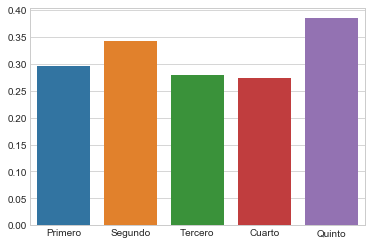

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

resultsMean = [meanSeventh, meanEighth, meanNineth, meanTenth, meanEleventh]

data = np.array(resultsMean).reshape((1, len(resultsMean)))
labels = ['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto']
df = pd.DataFrame(data, columns=labels)
df
ax = sns.barplot(data=df)

### Pruebas aparte de todo

In [95]:
dfSeventh['value'].values[0]

'Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.'

In [21]:
clean_text(dfSeventh['value'].values[0])

2018-06-17 13:56:46,678 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}


['han',
 'convertido',
 'persisten',
 'donar',
 'lograr',
 'es',
 'aumentar',
 'hacen',
 'salvar']

In [35]:
dic[616]

'existen'

In [23]:
dfSeventh['value'].values[0]

'Si bien los trasplantes se han convertido en una práctica habitual, aún persisten fuertes temores en la población para donar órganos, lograr su superación es la clave para aumentar el número de los donadores solidarios que hacen falta para salvar miles de vidas.'

In [24]:
textOfSeventhGrade[0]
text_tokens = nltk.word_tokenize(dfSeventh['value'].values[0])
pos_tags = stanfordNLP.pos(dfSeventh['value'].values[0])
verbs = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1].startswith('v')]
# verbs

2018-06-17 13:56:54,785 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}


In [36]:
temp_verbs = extractVerbsFromText(dfSeventh['value'].values[0])
temp_verbs

2018-06-18 02:03:34,912 : INFO : {'properties': "{'annotators': 'pos', 'outputFormat': 'json'}", 'pipelineLanguage': 'es'}


['han',
 'convertido',
 'persisten',
 'donar',
 'lograr',
 'es',
 'aumentar',
 'hacen',
 'salvar']

In [41]:
test_verb = "han"
test_verb2 = "convertido"
vec_bow = dic.doc2bow(test_verb.lower().split())
vec_bow2 = dic.doc2bow(test_verb2.lower().split())

# convert the query to LSI space
vec_lsi = model[vec_bow]
vec_lsiV = [element[1] for element in vec_lsi]
vec_lsi2 = model[vec_bow2]
vec_lsi2V = [element[1] for element in vec_lsi2]
index = similarities.MatrixSimilarity(model[corp])

# perform a similarity query against the corpus
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
# print(vec_lsi)
# print(vec_lsi2)


np.dot(vec_lsiV, vec_lsi2V)/(np.linalg.norm(vec_lsiV) * np.linalg.norm(vec_lsi2V))
# 0.55165374
# corp
# sims


2018-06-18 02:06:55,522 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-06-18 02:06:55,541 : INFO : creating matrix with 746 documents and 2 features


0.590906854047795

In [40]:
# for text_data in textOfSeventhGrade:
#     vebs = extractVerbsFromText(text_data)
#     for verb in verbs:
#         vec_bow = dic.doc2bow(verb.lower().split())
        
#         # convert the query to LSI space
#         vec_lsi = model[vec_bow]
#         index = similarities.MatrixSimilarity(model[corp])

#         # perform a similarity query against the corpus
#         sims = index[vec_lsi]
#         sims = sorted(enumerate(sims), key=lambda item: -item[1])

NameError: name 'textOfSeventhGrade' is not defined